# Problem Statement 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = pd.read_csv('C:/Users/Dell/Desktop/Assignments/Multi Linear Regression/50_Startups.csv')

In [3]:
a.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
a.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
#Checking NA values
a.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

# Correlation Matrix

In [11]:
a.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot using the variables 

In [13]:
import seaborn as sns

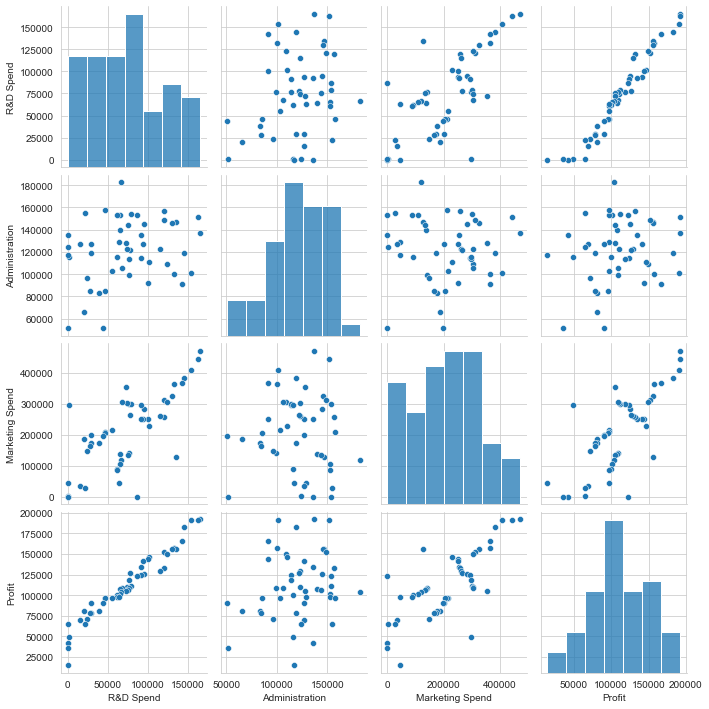

In [17]:
sns.set_style('whitegrid')
sns.pairplot(a)

In [19]:
b = pd.get_dummies(a['State'], drop_first=1)
b.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [20]:
c = a.drop('State', axis=1)
c.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [22]:
df = pd.concat([b,c], axis=1)
df.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94


In [23]:
data = df.rename(columns={"New York": "NY", "R&D Spend": "RDS", "Marketing Spend": "MS","Administration" : "Admin"})
data.head()

,Florida,NY,RDS,Admin,MS,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94


# Model Creation

In [25]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~NY+Florida+RDS+Admin+MS', data = data).fit()

In [27]:
model.params

Intercept    50125.343832
NY             -41.887019
Florida        198.788793
RDS              0.806023
Admin           -0.027004
MS               0.026980
dtype: float64

In [29]:
#RSquared and Adj. RSquared values
(model.rsquared, model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

# Simple Linear Regression Models

In [30]:
model_ny = smf.ols('Profit~NY', data = data).fit()
model_Florida = smf.ols('Profit~Florida', data=data).fit()
model_RDS = smf.ols('Profit~RDS', data = data).fit()
model_Admin = smf.ols('Profit~Admin', data = data).fit()
model_MS = smf.ols('Profit~MS', data = data).fit()

In [31]:
model_ny.pvalues, model_Florida.pvalues, model_RDS.pvalues, model_Admin.pvalues, model_MS.pvalues

(Intercept    1.616581e-20
 NY           8.287963e-01
 dtype: float64,
 Intercept    1.586129e-20
 Florida      4.214479e-01
 dtype: float64,
 Intercept    2.782697e-24
 RDS          3.500322e-32
 dtype: float64,
 Intercept    0.003824
 Admin        0.162217
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

# VIF Calculation

In [47]:
rsq_ny = smf.ols('NY~Florida+RDS+Admin+MS', data = data).fit().rsquared
rsq_Florida = smf.ols('Florida~NY+RDS+Admin+MS', data = data).fit().rsquared
rsq_RDS = smf.ols('RDS~NY+Florida+Admin+MS', data = data).fit().rsquared
rsq_Admin = smf.ols('Admin~NY+Florida+RDS+MS', data = data).fit().rsquared
rsq_MS = smf.ols('MS~NY+Florida+RDS+Admin', data = data).fit().rsquared
vif_ny = 1/(1-rsq_ny)
vif_Florida = 1/(1-rsq_Florida)
vif_RDS = 1/(1-rsq_RDS)
vif_Admin = 1/(1-rsq_Admin)
vif_MS = 1/(1-rsq_MS)

In [57]:
set = {'Variables': ['NY', 'Florida', 'RDS', 'Admin', 'MS'], 'VIF Values': [vif_ny, vif_Florida, vif_RDS, vif_Admin, vif_MS]}
vif_frame = pd.DataFrame(set)
vif_frame

,Variables,VIF Values
0,NY,1.335061
1,Florida,1.387641
2,RDS,2.495511
3,Admin,1.177766
4,MS,2.416797


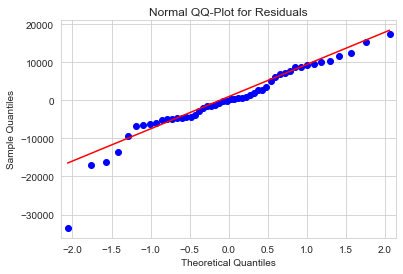

In [58]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal QQ-Plot for Residuals')
plt.show()

# Residual vs Regressors

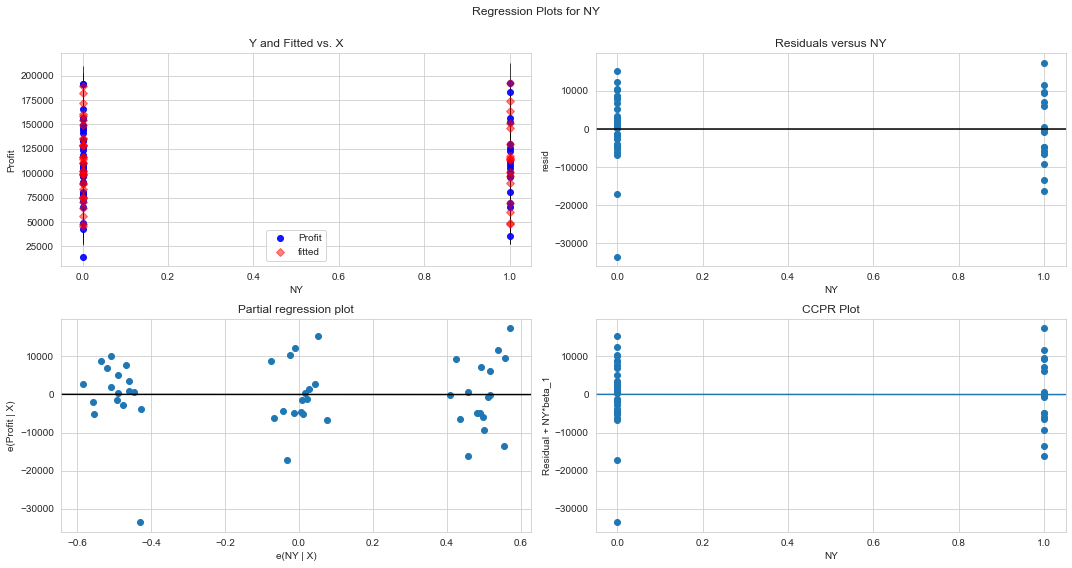

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "NY", fig=fig)
plt.show()

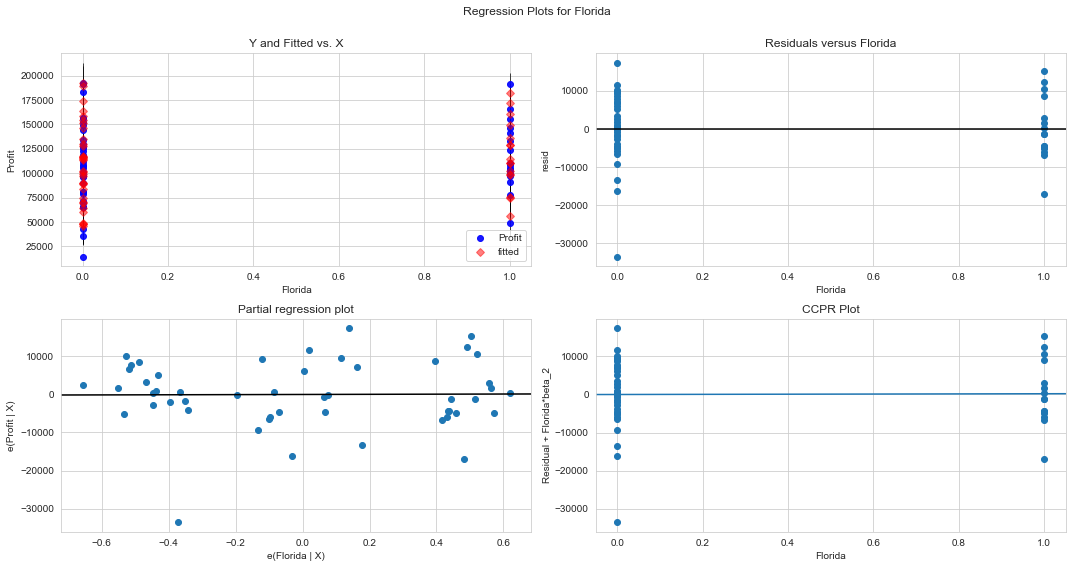

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Florida", fig=fig)
plt.show()

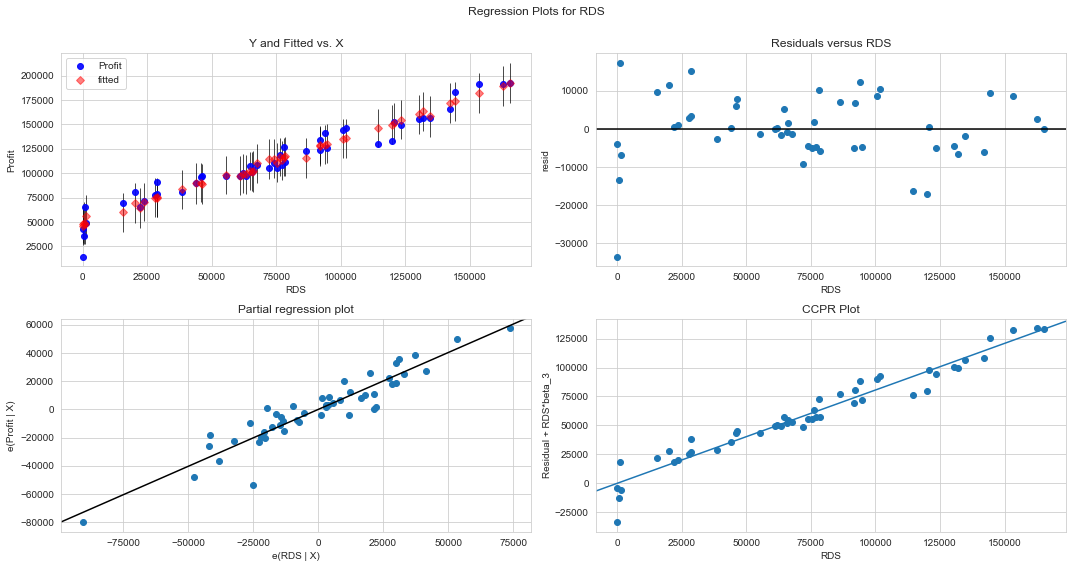

In [46]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"RDS", fig=fig)
plt.show()

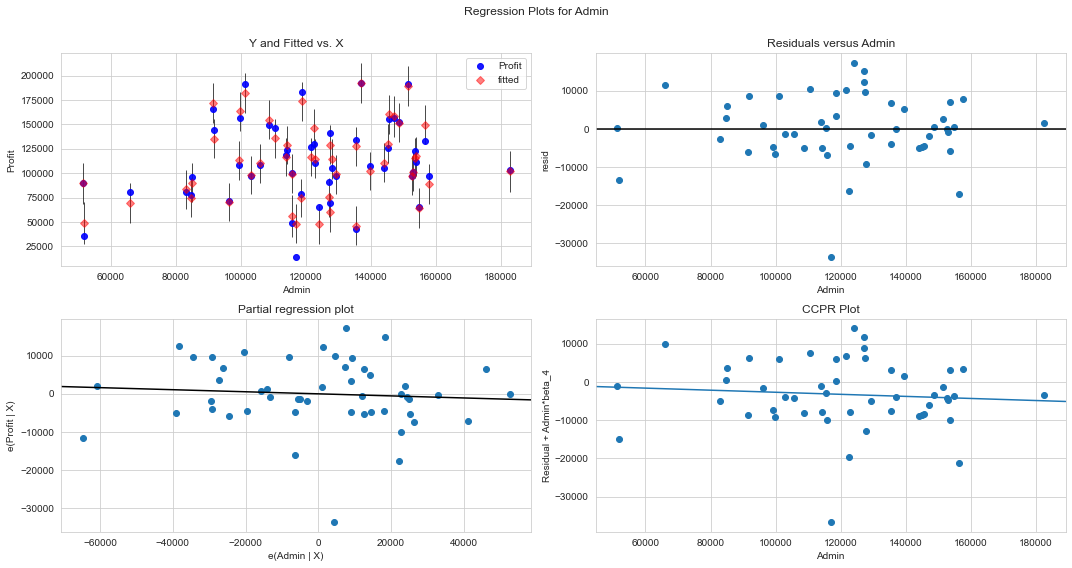

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Admin", fig=fig)
plt.show()

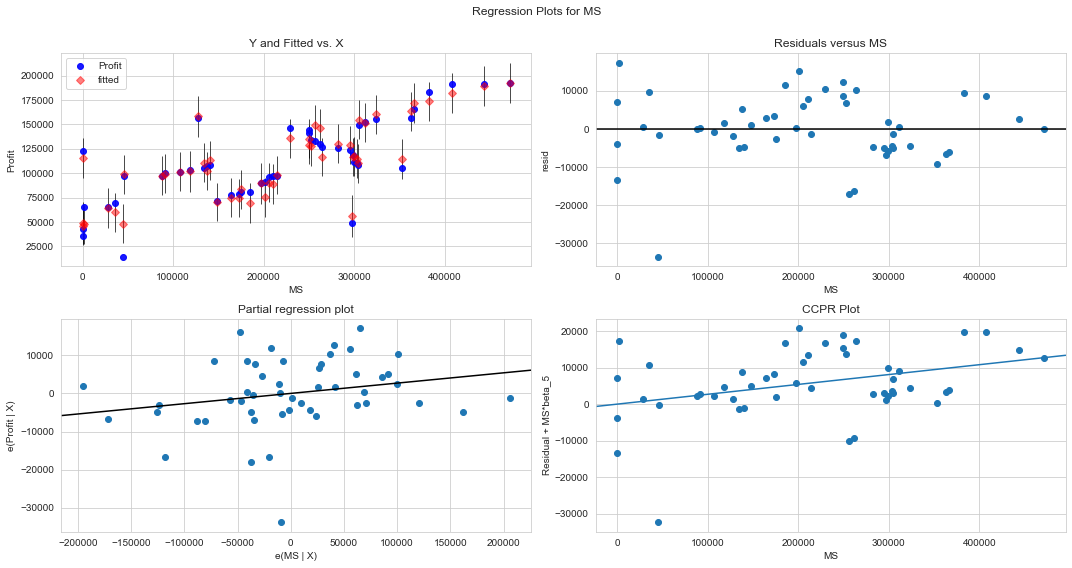

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"MS", fig=fig)
plt.show()

In [62]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

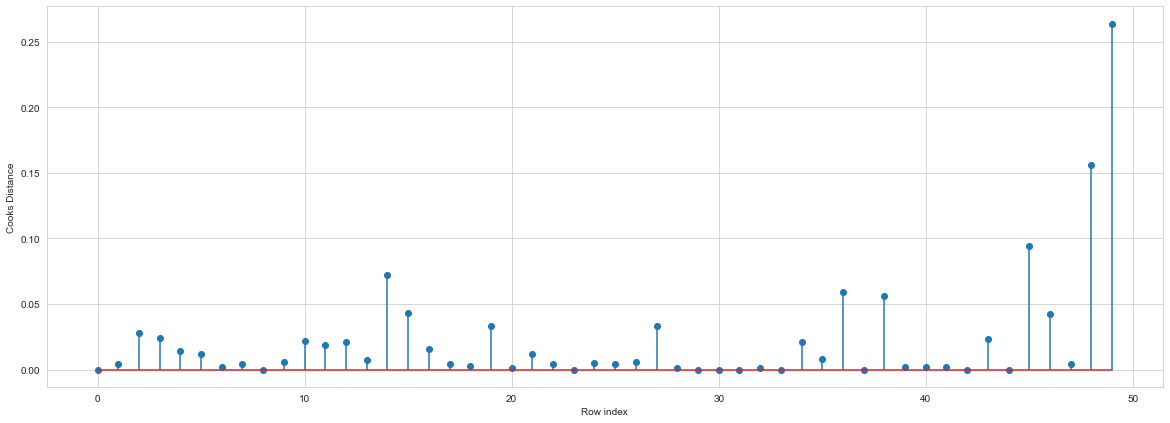

In [63]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

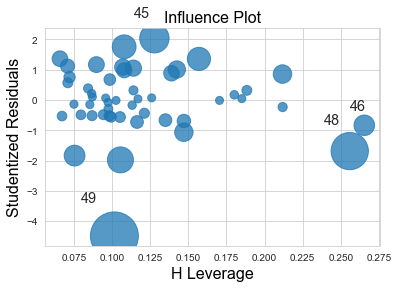

In [64]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [71]:
data1 =data.drop(data.index[[45,46,48,49]],axis=0).reset_index()

In [72]:
data1 =data1.drop(['index'],axis=1)

In [73]:
data1

,Florida,NY,RDS,Admin,MS,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94
5,0,1,131876.90,99814.71,362861.36,156991.12
6,0,0,134615.46,147198.87,127716.82,156122.51
7,1,0,130298.13,145530.06,323876.68,155752.60
8,0,1,120542.52,148718.95,311613.29,152211.77
9,0,0,123334.88,108679.17,304981.62,149759.96


In [74]:
final_model = smf.ols('Profit~Florida+NY+RDS+Admin+MS',data = data1).fit()
finalmodelwt = final_model.rsquared
final_model.params

Intercept    57259.700904
Florida       -912.428437
NY           -1744.998960
RDS              0.773029
Admin           -0.052036
MS               0.028312
dtype: float64

In [77]:
new_data = pd.DataFrame({'Florida':0,'NY':0,'RDS':42107,'Admin':9131.8,'MS':36168},index=[1])
predictwt = final_model.predict(new_data)
predictwt

1    90358.447036
dtype: float64

# Transformations

# Standardization

In [85]:
from sklearn.preprocessing import StandardScaler
data12 = pd.read_csv('C:/Users/Dell/Desktop/Assignments/Multi Linear Regression/50_Startups.csv')

In [86]:
data12.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [88]:
a = pd.get_dummies(data12['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [89]:
b = data12.drop('State', axis=1)
b.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [90]:
data=b
data.iloc[:,:] = StandardScaler().fit_transform(data.iloc[:,:])
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


In [91]:
c = pd.concat([a,b], axis=1)
c.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,2.016411,0.560753,2.153943,2.011203
1,0,0,1.955860,1.082807,1.923600,1.999430
2,1,0,1.754364,-0.728257,1.626528,1.980842
3,0,1,1.554784,-0.096365,1.422210,1.776627
4,1,0,1.504937,-1.079919,1.281528,1.357740


In [92]:
data = c.rename(columns={'New York':'NY', 'R&D Spend':'RDS','Administration':'Admin', 'Marketing Spend':'MS'})
data.head()

,Florida,NY,RDS,Admin,MS,Profit
0,0,1,2.016411,0.560753,2.153943,2.011203
1,0,0,1.955860,1.082807,1.923600,1.999430
2,1,0,1.754364,-0.728257,1.626528,1.980842
3,0,1,1.554784,-0.096365,1.422210,1.776627
4,1,0,1.504937,-1.079919,1.281528,1.357740


In [93]:
data.corr()

,Florida,NY,RDS,Admin,MS,Profit
Florida,1.000000,-0.492366,0.105711,0.010493,0.205685,0.116244
NY,-0.492366,1.000000,0.039068,0.005145,-0.033670,0.031368
RDS,0.105711,0.039068,1.000000,0.241955,0.724248,0.972900
Admin,0.010493,0.005145,0.241955,1.000000,-0.032154,0.200717
MS,0.205685,-0.033670,0.724248,-0.032154,1.000000,0.747766
Profit,0.116244,0.031368,0.972900,0.200717,0.747766,1.000000


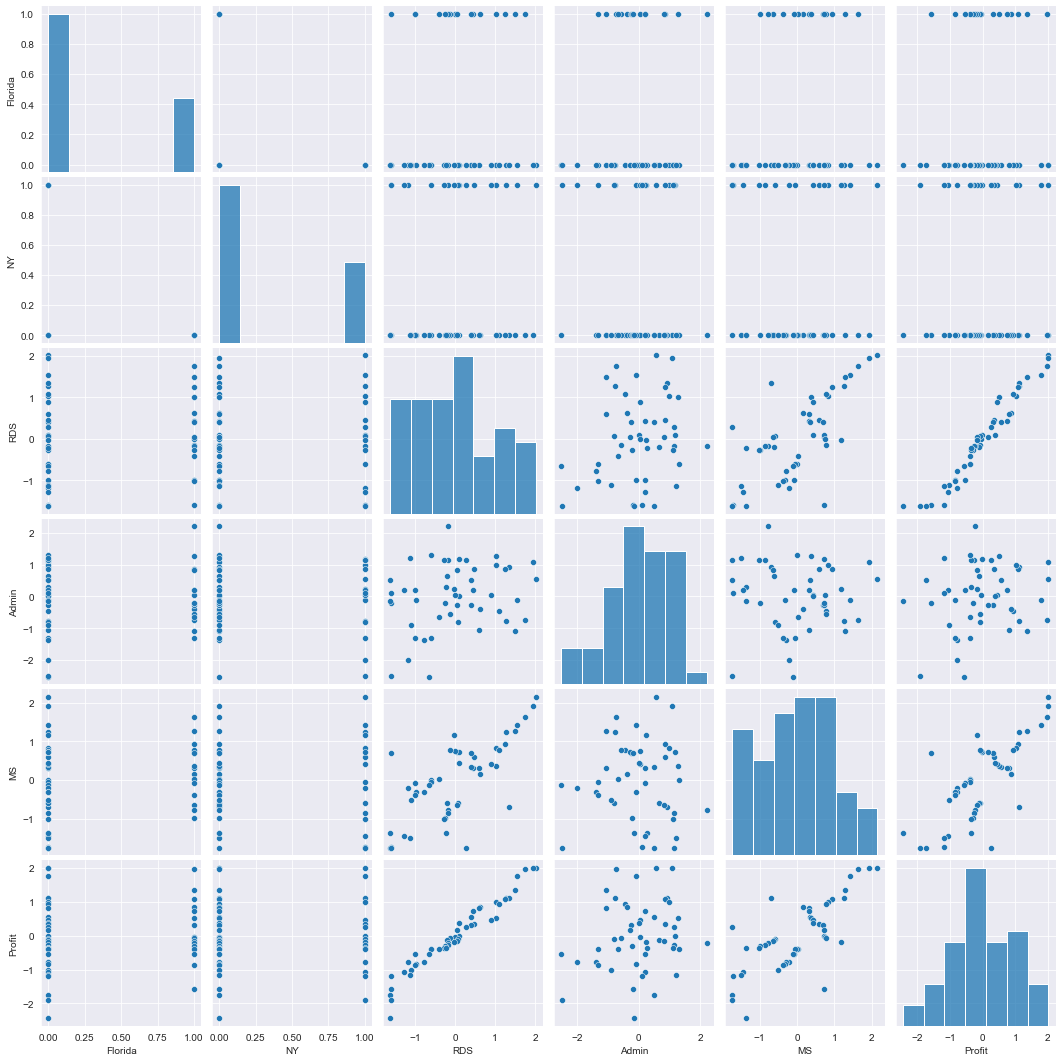

In [95]:
sns.set_style('darkgrid')
sns.pairplot(data)

In [96]:
model1 = smf.ols('Profit~Florida+NY+Admin+MS+RDS', data = data).fit()

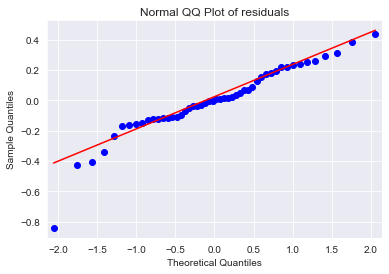

In [97]:
qqplot = sm.qqplot(model1.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

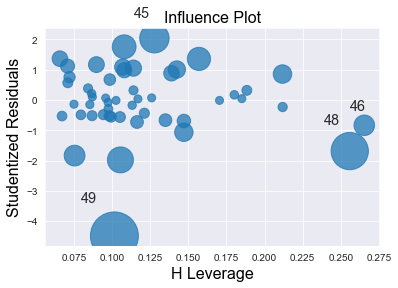

In [98]:
influence_plot(model1)
plt.show()

In [100]:
data_new = data.drop(data.index[[45,46,48,49]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

In [102]:
final_model = smf.ols('Profit~Florida+NY+RDS+Admin+MS',data=data_new).fit()
finalmodel1 = final_model.rsquared

In [104]:
new_data = pd.DataFrame({'Florida':1,'NY':0,'RDS':142107,'Admin':91391.8,'MS':366168},index=[1])
predict1 = final_model.predict(new_data)

In [105]:
final_model.params

Intercept    0.047525
Florida     -0.022867
NY          -0.043733
RDS          0.880356
Admin       -0.036172
MS           0.085901
dtype: float64

In [106]:
finalmodel1

0.9629967080989382

In [107]:
predict1

1    153253.009644
dtype: float64

# Normalization

In [109]:
df = pd.read_csv('C:/Users/Dell/Desktop/Assignments/Multi Linear Regression/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [111]:
a = pd.get_dummies(df['State'], drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [112]:
b = df.drop('State', axis=1)
b.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [113]:
from sklearn.preprocessing import Normalizer
n = Normalizer()
ndf = n.fit_transform(b)
ndf = n.transform(b)
df_ndata = pd.DataFrame(data=ndf, columns=['R&D Spend','Administration','Marketing Spend','Profit'])
df_ndata.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,0.299093,0.247629,0.853391,0.347775
1,0.305549,0.284464,0.834161,0.360410
2,0.315397,0.207903,0.838503,0.392701
3,0.311201,0.255803,0.826004,0.394254
4,0.325807,0.209532,0.839508,0.381016


In [114]:
df_ndata = pd.concat([a,df_ndata],axis=1)
df_ndata.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,0.299093,0.247629,0.853391,0.347775
1,0,0,0.305549,0.284464,0.834161,0.360410
2,1,0,0.315397,0.207903,0.838503,0.392701
3,0,1,0.311201,0.255803,0.826004,0.394254
4,1,0,0.325807,0.209532,0.839508,0.381016


In [116]:
df_ndata.corr()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
Florida,1.000000,-0.492366,0.090983,-0.216427,0.261461,-0.109965
New York,-0.492366,1.000000,0.004907,0.069968,-0.172158,0.182760
R&D Spend,0.090983,0.004907,1.000000,-0.396416,0.220266,0.497899
Administration,-0.216427,0.069968,-0.396416,1.000000,-0.909188,0.212358
Marketing Spend,0.261461,-0.172158,0.220266,-0.909188,1.000000,-0.447095
Profit,-0.109965,0.182760,0.497899,0.212358,-0.447095,1.000000


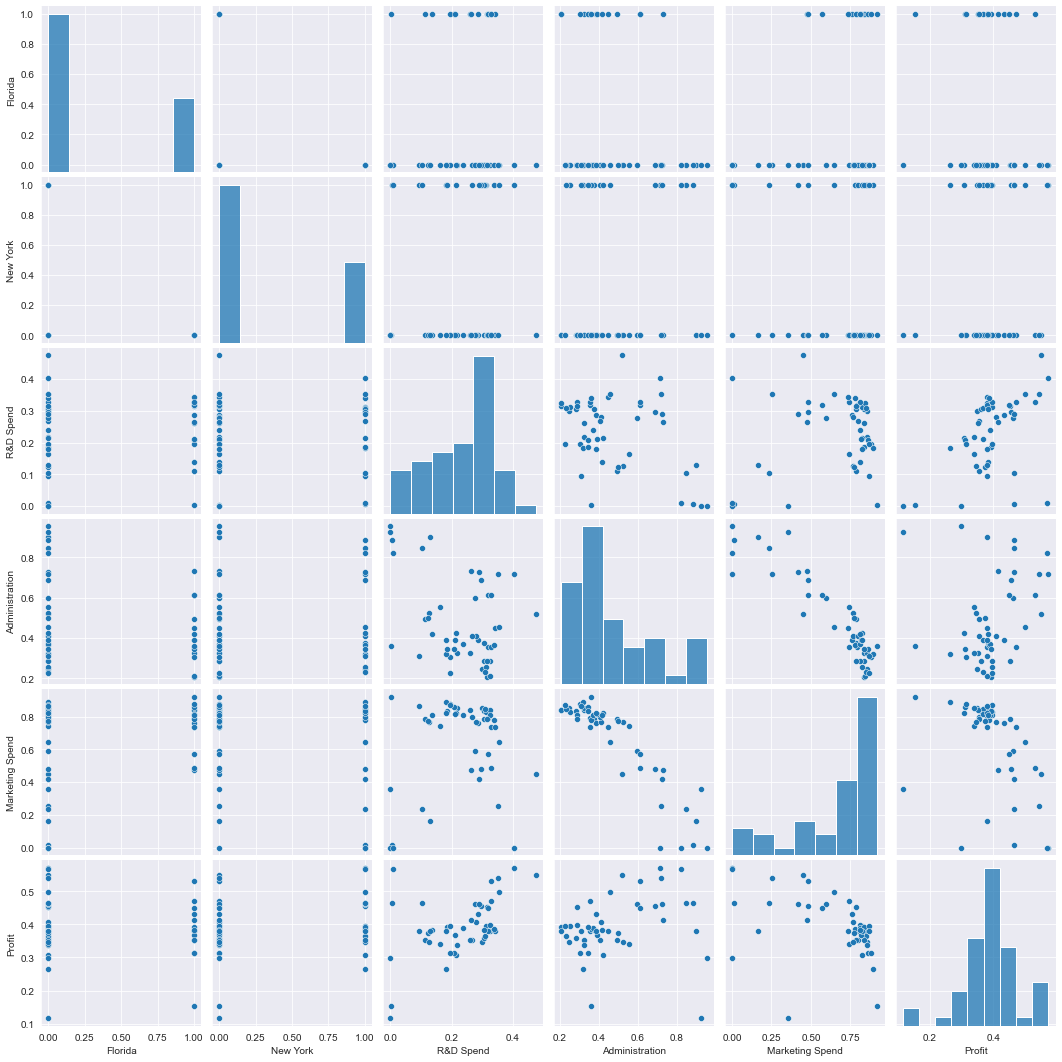

In [117]:
sns.pairplot(df_ndata)

In [118]:
data = df_ndata.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS", "Administration":"Admin"})
data.head()

,Florida,NY,RDS,Admin,MS,Profit
0,0,1,0.299093,0.247629,0.853391,0.347775
1,0,0,0.305549,0.284464,0.834161,0.360410
2,1,0,0.315397,0.207903,0.838503,0.392701
3,0,1,0.311201,0.255803,0.826004,0.394254
4,1,0,0.325807,0.209532,0.839508,0.381016


In [119]:
model2 = smf.ols('Profit~Florida+NY+RDS+Admin+MS',data=data).fit()

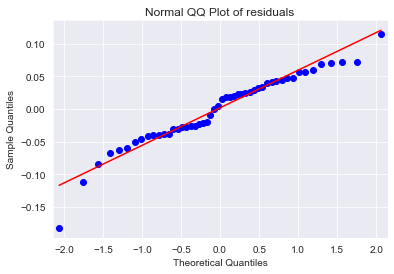

In [120]:
qqplot = sm.qqplot(model2.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

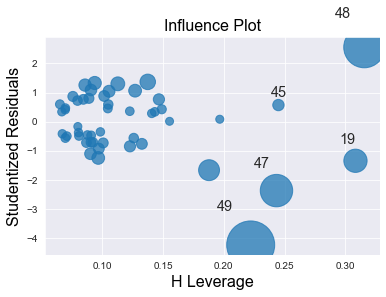

In [121]:
influence_plot(model2)
plt.show()

In [122]:
model_influence = model2.get_influence()
(c,x) = model_influence.cooks_distance

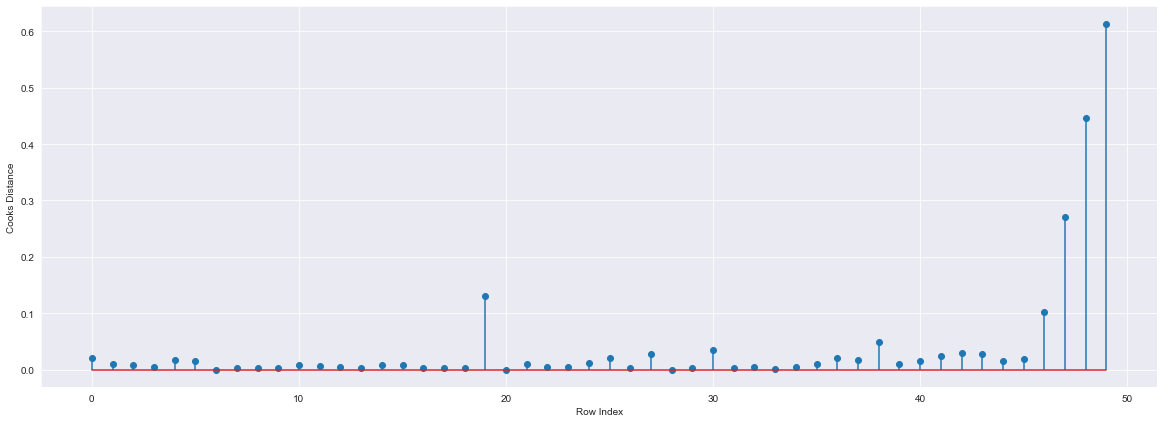

In [124]:
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [125]:
data_new = data.drop(data.index[[47,48,49]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

In [127]:
final_model = smf.ols('Profit~Florida+NY+RDS+Admin+MS',data=data_new).fit()
modelnorm = final_model.rsquared

In [128]:
new_data = pd.DataFrame({'Florida':1,'NY':0,'RDS':142107,'Admin':91391.8,'MS':366168},index=[1])
predict2 = final_model.predict(new_data)

In [129]:
modelnorm

0.7397068554087449

In [130]:
predict2

1   -42999.587575
dtype: float64

In [133]:
Analysis = {'Method':['OLS with Standard Scaler','OLS with Normalization'],'R-Squared Values':[finalmodel1,modelnorm],'Predicted Value':[predict1,predict2]}
Analysis = pd.DataFrame(Analysis)

Analysis

,Method,R-Squared Values,Predicted Value
0,OLS with Standard Scaler,0.962997,1 153253.009644 dtype: float64
1,OLS with Normalization,0.739707,1 -42999.587575 dtype: float64
